#             $$\text{Gnu Radio Companion with Machine Learning} $$

In [20]:
import pandas as pd
import numpy as np
import warnings 
from Library.metrics import metrics
from Library.sinais__ import signal, concat_3 , concat_2
from sklearn.neighbors import KNeighborsClassifier
from Library.TrainTestSplit_ import TrainTestSplit 
from Library.Plots_model import Visualization ,RandomizedSearchCVWrapper
from Library.metrics import metrics
import category_encoders as ce
warnings.filterwarnings('ignore')


In [25]:
Clear = np.load("Data_\Clear.npy")
WIFI_FLOOD = np.load("Data_\WIFI_FLOOD.npy")
LTE_FLOOD = np.load("Data_\LTE_FLOOD.bin.npy")
WIFI_300PING = np.load("Data_\WIFI_PING300.npy")
LTE_300PING = np.load("Data_\LTE_PING300.npy")
WIFI_1M = np.load("Data_\WIFI_1M.npy")
LTE_1M = np.load("Data_\LTE_1M.npy")
knn = KNeighborsClassifier(n_neighbors= 9,weights='distance', p=2)


In [4]:

WIFI_1M = (signal(data=WIFI_1M,slice = 400000, sinal = 'WIFI_1M',id = 'WIFI_1M'))
WIFI_1M.info()
WIFI_1M.to_pandas()
WIFI_1M.database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype    
---  ------  --------------   -----    
 0   0       400000 non-null  complex64
dtypes: complex64(1)
memory usage: 3.1 MB
None


,WIFI_1M_Real,WIFI_1M_Imag,ID
0,-0.000061,-0.000031,WIFI_1M
1,0.000092,0.000092,WIFI_1M
2,0.000031,0.000061,WIFI_1M
3,-0.000092,0.000122,WIFI_1M
4,-0.000183,0.000061,WIFI_1M
...,...,...,...
399995,-0.000519,-0.000488,WIFI_1M
399996,-0.000336,-0.000732,WIFI_1M
399997,-0.000336,-0.000732,WIFI_1M
399998,-0.000427,-0.000580,WIFI_1M


In [5]:
CLEAR = (signal(data=Clear,slice = 400000, sinal = 'Clear', id = 'Clear'))
CLEAR.info()
CLEAR.to_pandas()
CLEAR.database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype    
---  ------  --------------   -----    
 0   0       400000 non-null  complex64
dtypes: complex64(1)
memory usage: 3.1 MB
None


,Clear_Real,Clear_Imag,ID
0,0.004425,0.006348,Clear
1,0.005676,0.006348,Clear
2,0.006317,0.007904,Clear
3,0.006562,0.008515,Clear
4,0.006745,0.009980,Clear
...,...,...,...
399995,0.000061,-0.000519,Clear
399996,-0.000031,-0.000732,Clear
399997,0.000031,-0.000641,Clear
399998,-0.000092,-0.000763,Clear


In [6]:
LTE_1M = (signal(data=LTE_1M,slice = 400000, sinal = 'LTE_1M', id='LTE_1M'))
LTE_1M.info()
LTE_1M.to_pandas()
LTE_1M.database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype    
---  ------  --------------   -----    
 0   0       400000 non-null  complex64
dtypes: complex64(1)
memory usage: 3.1 MB
None


,LTE_1M_Real,LTE_1M_Imag,ID
0,0.000244,0.000122,LTE_1M
1,0.000153,-0.000153,LTE_1M
2,-0.000153,-0.000153,LTE_1M
3,0.000000,0.000336,LTE_1M
4,0.000275,0.000305,LTE_1M
...,...,...,...
399995,-0.000122,-0.000336,LTE_1M
399996,0.000000,-0.000427,LTE_1M
399997,0.000183,-0.000214,LTE_1M
399998,0.000122,-0.000397,LTE_1M


In [7]:
uniao = concat_3(database1= CLEAR.database, database2=WIFI_1M.database,database3=LTE_1M.database ,sinal1 ='Clear',sinal2 = 'WIFI_1M',sinal3 = 'LTE_1M')
uniao.merge()
df = uniao.concat
df.info()
df

Concatenação efetuada
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   Signals  1200000 non-null  object 
 1   Real     1200000 non-null  float32
 2   Imag     1200000 non-null  float32
 3   ID       1200000 non-null  object 
dtypes: float32(2), object(2)
memory usage: 27.5+ MB


,Signals,Real,Imag,ID
0,Clear,0.004425,0.006348,Clear
1,Clear,0.005676,0.006348,Clear
2,Clear,0.006317,0.007904,Clear
3,Clear,0.006562,0.008515,Clear
4,Clear,0.006745,0.009980,Clear
...,...,...,...,...
1199995,LTE_1M,-0.000122,-0.000336,LTE_1M
1199996,LTE_1M,0.000000,-0.000427,LTE_1M
1199997,LTE_1M,0.000183,-0.000214,LTE_1M
1199998,LTE_1M,0.000122,-0.000397,LTE_1M


In [17]:

spliter = TrainTestSplit(data = df)
# Acessando os conjuntos de treinamento e teste
X_train, X_test, y_train, y_test =spliter.train_test_split( test_size=0.275, random_state=42)

print("x_train:", X_train)
print("y_train:", X_test)
print("x_test:", y_train)
print("y_test:", y_test)


x_train:              Real      Imag
597824  -0.002655 -0.004089
790086  -0.000366 -0.000488
1122075  0.000153 -0.000549
78230   -0.001099 -0.009766
421094  -0.016450 -0.023835
...           ...       ...
110268  -0.000732 -0.007263
259178  -0.000061 -0.001770
131932  -0.000641 -0.005951
671155  -0.001282 -0.002014
121958  -0.000610 -0.006317

[870000 rows x 2 columns]
y_train:              Real      Imag
372605   0.000183 -0.000397
551204  -0.004456 -0.006714
240320  -0.000183 -0.001923
1047361  0.000183 -0.001801
555362  -0.004334 -0.006531
...           ...       ...
721659  -0.000824 -0.001282
891325  -0.000275 -0.007935
923073  -0.000275 -0.005799
81362   -0.001160 -0.009735
746478  -0.000763 -0.001129

[330000 rows x 2 columns]
x_test: 597824     WIFI_1M
790086     WIFI_1M
1122075     LTE_1M
78230        Clear
421094     WIFI_1M
            ...   
110268       Clear
259178       Clear
131932       Clear
671155     WIFI_1M
121958       Clear
Name: ID, Length: 870000, dtype: object

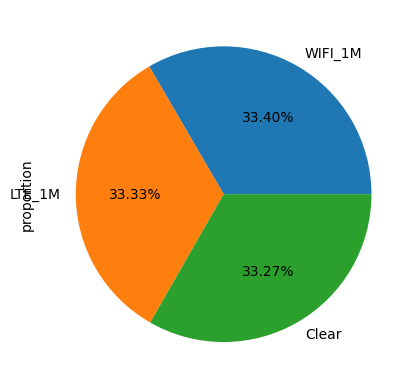

In [18]:
# Criando um objeto Visualization
from Library.Plots_model import Visualization
vis = Visualization()


# Plotando o gráfico de pizza
vis.plot_pie(y_test) # Distruição de X_train

In [19]:
from Library.Normalizing import Normalizing
normalized = Normalizing(X_train=X_train, X_test= X_test)
print(f"""\n normalized.X_test: {normalized.X_test}
normalized.X_train {normalized.X_train}""")


 normalized.X_test: [[0.4251852  0.4284137 ]
 [0.35012347 0.35222673]
 [0.41925925 0.41001105]
 ...
 [0.41777778 0.36326832]
 [0.4034568  0.3157895 ]
 [0.40987656 0.41958043]]
normalized.X_train [[0.36222327 0.423025  ]
 [0.39755064 0.46286294]
 [0.40555817 0.46218774]
 ...
 [0.39331135 0.4024308 ]
 [0.3834197  0.44598246]
 [0.39378238 0.3983795 ]]


In [18]:


knn_fit = knn.fit(normalized.X_train ,y_train)
model = knn_fit
model

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [19]:

metrics = metrics(model = model,
X_train =normalized.X_train,X_test = normalized.X_test, y_train=y_train ,y_test=y_test)

metrics.table()

,Score,Accuracy,F1-Score,Recall
0,0.398979,0.398979,0.308478,0.398979


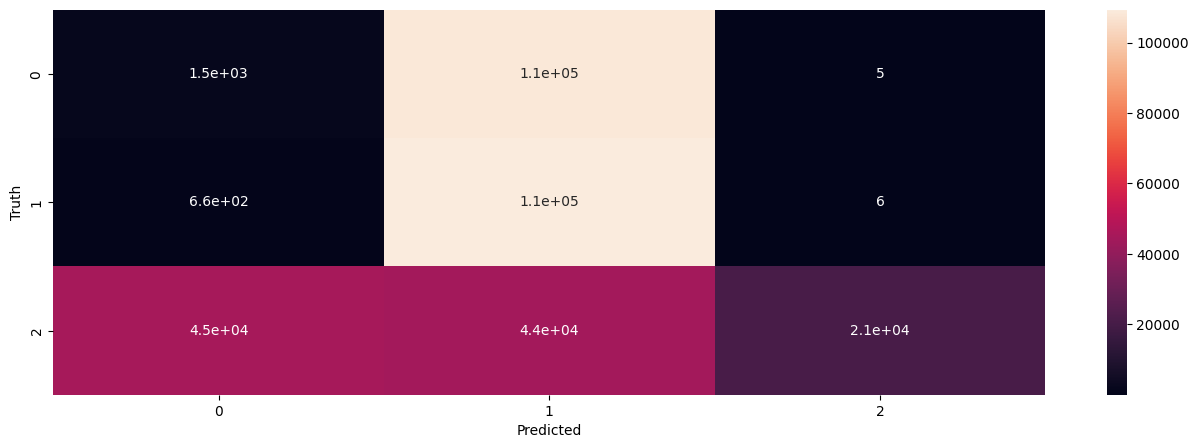

In [20]:

confusion = Visualization()
confusion_matrix = confusion.confusion_matrix(model=model,X_train =normalized.X_train,
X_test= normalized.X_test, y_train= y_train, y_test= y_test)

In [21]:
metrics.confusion_matrix()

array([[  1469, 108321,      5],
       [   655, 109338,      6],
       [ 45064,  44286,  20856]], dtype=int64)

In [22]:
metrics.report()

              precision    recall  f1-score   support

       Clear       0.03      0.01      0.02    109795
      LTE_1M       0.42      0.99      0.59    109999
     WIFI_1M       1.00      0.19      0.32    110206

    accuracy                           0.40    330000
   macro avg       0.48      0.40      0.31    330000
weighted avg       0.48      0.40      0.31    330000



In [29]:
%%time

encoder = ce.ordinal.OrdinalEncoder()

parameters = {'n_neighbors': [21,27,15,17,19],
                         'weights': ['uniform', 'distance'], 'p':[1,2]
             }
n_iter=4
cv=3
scoring='neg_mean_squared_error' 
random_state=42
return_train_score=True
n_jobs = -1
verbose = 0
knn = KNeighborsClassifier()

random_model = RandomizedSearchCVWrapper(model= knn, param_distributions =parameters , 
X_train = normalized.X_train, y_train= encoder.fit_transform(y_train),
 n_iter= n_iter, cv=cv,random_state=random_state,
return_train_score =return_train_score, scoring= scoring,
 n_jobs = n_jobs, verbose = verbose )


CPU times: total: 1.19 s
Wall time: 1min 58s


In [30]:
random_model.__dict__

{'model': KNeighborsClassifier(),
 'param_distributions': {'n_neighbors': [21, 27, 15, 17, 19],
  'weights': ['uniform', 'distance'],
  'p': [1, 2]},
 'n_iter': 4,
 'cv': 3,
 'random_state': 42,
 'n_jobs': -1,
 'scoring': 'neg_mean_squared_error',
 'verbose': 0,
 'return_train_score': True,
 'randomsearch': RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=4, n_jobs=-1,
                    param_distributions={'n_neighbors': [21, 27, 15, 17, 19],
                                         'p': [1, 2],
                                         'weights': ['uniform', 'distance']},
                    random_state=42, return_train_score=True,
                    scoring='neg_mean_squared_error'),
 'random_fit': RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=4, n_jobs=-1,
                    param_distributions={'n_neighbors': [21, 27, 15, 17, 19],
                                         'p': [1, 2],
                                         'weights': ['uni

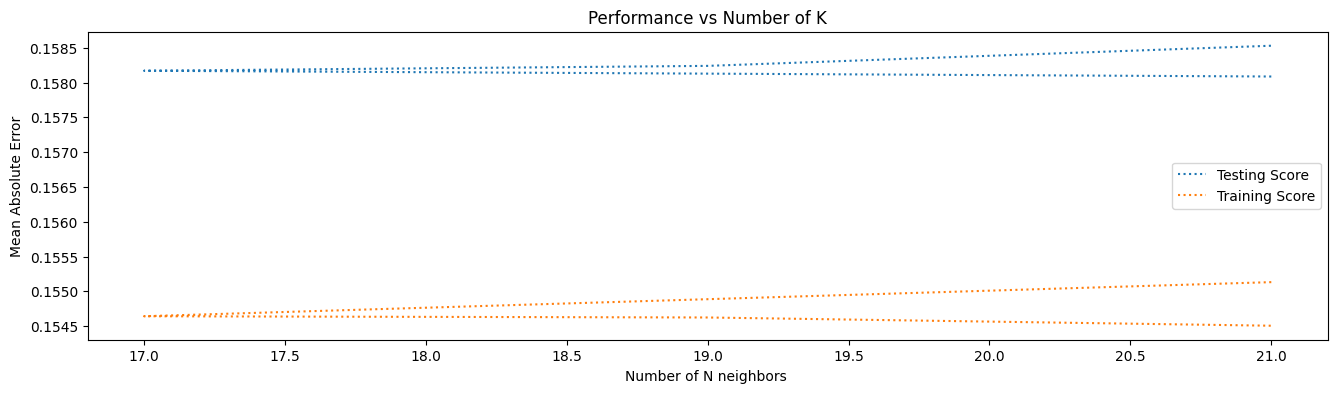

In [31]:
random_model.plot_mean_performance()

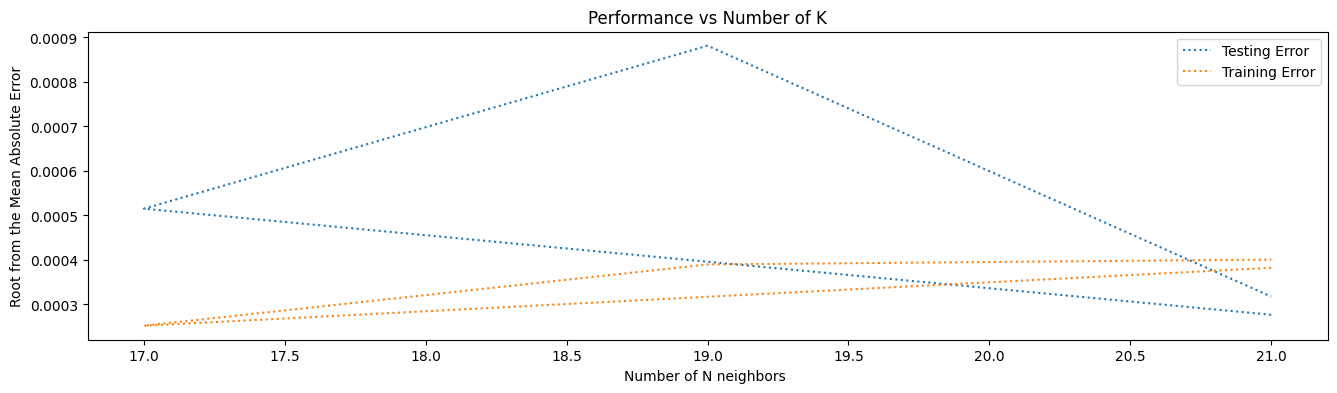

In [32]:
random_model.plot_std_performance()

In [33]:
random_model.results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_p,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.996525,0.067889,43.000048,0.032307,uniform,1,21,"{'weights': 'uniform', 'p': 1, 'n_neighbors': 21}",-0.157810,-0.158466,-0.157986,-0.158087,0.000277,1,-0.154657,-0.155147,-0.155593,-0.155132,0.000382
2,2.754794,0.144825,16.073277,1.544903,distance,2,17,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",-0.158472,-0.158593,-0.157445,-0.158170,0.000515,2,-0.154298,-0.154731,-0.154897,-0.154642,0.000252
1,2.891978,0.072911,17.140075,0.295710,distance,1,19,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",-0.158210,-0.159334,-0.157176,-0.158240,0.000882,3,-0.154145,-0.155100,-0.154628,-0.154624,0.000390
3,2.700143,0.139525,16.044189,1.073599,distance,1,21,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",-0.158207,-0.158962,-0.158421,-0.158530,0.000318,4,-0.153986,-0.154569,-0.154962,-0.154506,0.000401


In [34]:
random_model.randomsearch

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=4, n_jobs=-1,
                   param_distributions={'n_neighbors': [21, 27, 15, 17, 19],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [35]:
random_model.random_fit

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=4, n_jobs=-1,
                   param_distributions={'n_neighbors': [21, 27, 15, 17, 19],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [36]:


metrics_random = metrics(model = random_model.randomsearch.fit(normalized.X_train ,y_train),
X_train =normalized.X_train,X_test = normalized.X_test, y_train=y_train ,y_test=y_test)

In [37]:
metrics_random.report()

              precision    recall  f1-score   support

       Clear       0.02      0.01      0.01    109795
      LTE_1M       0.42      1.00      0.59    109999
     WIFI_1M       1.00      0.21      0.34    110206

    accuracy                           0.41    330000
   macro avg       0.48      0.41      0.31    330000
weighted avg       0.48      0.41      0.31    330000



In [38]:
metrics_random.confusion_matrix()

array([[   807, 108984,      4],
       [     4, 109993,      2],
       [ 41706,  45587,  22913]], dtype=int64)

### WIFI & CLEAR

In [14]:
WIFI_1M_Clear = concat_2(database1= CLEAR.database, database2=WIFI_1M.database ,sinal1 ='Clear',sinal2 = 'WIFI_1M')
WIFI_1M_Clear.merge()
WIFI_1M_Clear.concat.info()
df_WIFI_CLEAR = WIFI_1M_Clear.concat 
df_WIFI_CLEAR



Concatenação efetuada
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Signals  800000 non-null  object 
 1   Real     800000 non-null  float32
 2   Imag     800000 non-null  float32
 3   ID       800000 non-null  object 
dtypes: float32(2), object(2)
memory usage: 18.3+ MB


,Signals,Real,Imag,ID
0,Clear,0.004425,0.006348,Clear
1,Clear,0.005676,0.006348,Clear
2,Clear,0.006317,0.007904,Clear
3,Clear,0.006562,0.008515,Clear
4,Clear,0.006745,0.009980,Clear
...,...,...,...,...
799995,WIFI_1M,-0.000519,-0.000488,WIFI_1M
799996,WIFI_1M,-0.000336,-0.000732,WIFI_1M
799997,WIFI_1M,-0.000336,-0.000732,WIFI_1M
799998,WIFI_1M,-0.000427,-0.000580,WIFI_1M


In [15]:
from Library.TrainTestSplit_ import TrainTestSplit 
spliter = TrainTestSplit(data = df_WIFI_CLEAR)
# Acessando os conjuntos de treinamento e teste
X_train_Wifi_clear, X_test_Wifi_clear, y_train_Wifi_clear, y_test_Wifi_clear =spliter.train_test_split( test_size=0.275, random_state=42)

print("x_train:", X_train_Wifi_clear)
print("y_train:", X_test_Wifi_clear)
print("x_test:", y_train_Wifi_clear)
print("y_test:", y_test_Wifi_clear)


x_train:             Real      Imag
347845  0.000000 -0.000641
586568 -0.002930 -0.004852
275306  0.000122 -0.001740
475976 -0.009461 -0.013886
26302  -0.002014 -0.016266
...          ...       ...
259178 -0.000061 -0.001770
365838 -0.000061 -0.000397
131932 -0.000641 -0.005951
671155 -0.001282 -0.002014
121958 -0.000610 -0.006317

[579999 rows x 2 columns]
y_train:             Real      Imag
212188 -0.000366 -0.002716
299036  0.000153 -0.001160
475978 -0.009613 -0.014069
588988 -0.003082 -0.004822
138859 -0.000549 -0.005432
...          ...       ...
457258 -0.011444 -0.016663
76622  -0.001160 -0.009888
428389 -0.014863 -0.022065
505162 -0.007172 -0.010773
406966 -0.018891 -0.027680

[220001 rows x 2 columns]
x_test: 347845      Clear
586568    WIFI_1M
275306      Clear
475976    WIFI_1M
26302       Clear
           ...   
259178      Clear
365838      Clear
131932      Clear
671155    WIFI_1M
121958      Clear
Name: ID, Length: 579999, dtype: object
y_test: 212188      Clear
299036  

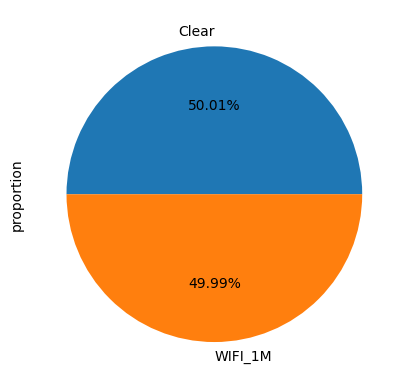

In [21]:

vis.plot_pie(y_test_Wifi_clear) # Distruição de X_train

In [23]:

normalized = Normalizing(X_train=X_train_Wifi_clear, X_test= X_test_Wifi_clear)
print(f"""\n normalized.X_test: {normalized.X_test}
normalized.X_train {normalized.X_train}""")


 normalized.X_test: [[0.4078374  0.38295454]
 [0.41606188 0.40227273]
 [0.26124817 0.24204545]
 ...
 [0.17803577 0.14280304]
 [0.29995158 0.2829545 ]
 [0.11417511 0.07310605]]
normalized.X_train [[0.403203   0.46605256]
 [0.35798398 0.41896963]
 [0.40508714 0.45377004]
 ...
 [0.39331135 0.40668714]
 [0.3834197  0.45069942]
 [0.39378238 0.402593  ]]


In [26]:

knn_fit_wifi_clear = knn.fit(normalized.X_train ,y_train_Wifi_clear)
knn_fit_wifi_clear


KNeighborsClassifier(n_neighbors=9, weights='distance')

In [27]:
metrics = metrics(model = knn_fit_wifi_clear,
X_train =normalized.X_train,X_test = normalized.X_test, y_train=y_train_Wifi_clear ,y_test=y_test_Wifi_clear)

metrics.table()

,Score,Accuracy,F1-Score,Recall
0,0.585534,0.585534,0.499552,0.585534


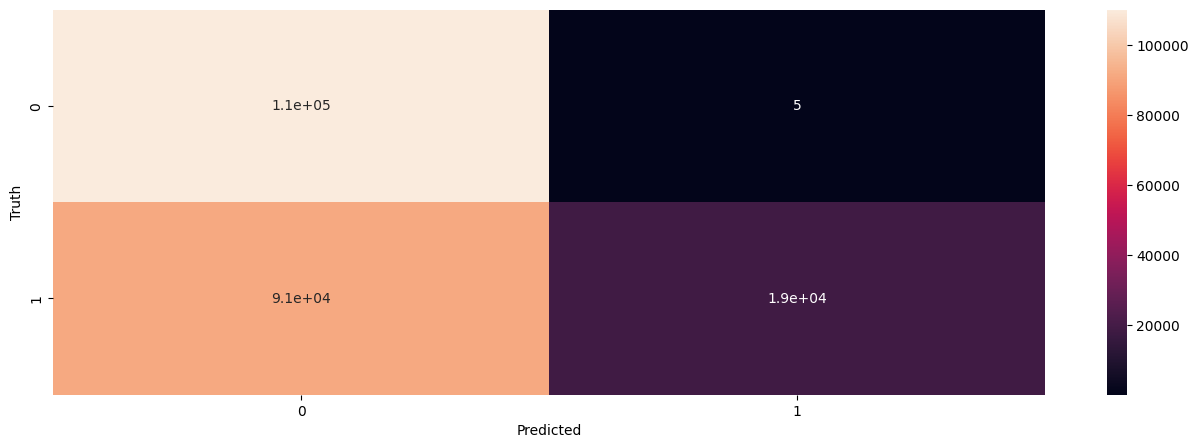

In [29]:
confusion = Visualization()
confusion_matrix_wifi_clear = confusion.confusion_matrix(model=knn_fit_wifi_clear,X_train =normalized.X_train,
X_test= normalized.X_test, y_train= y_train_Wifi_clear, y_test= y_test_Wifi_clear)

In [31]:
metrics.confusion_matrix()

array([[110010,      5],
       [ 91178,  18808]], dtype=int64)

In [32]:
metrics.report()

              precision    recall  f1-score   support

       Clear       0.55      1.00      0.71    110015
     WIFI_1M       1.00      0.17      0.29    109986

    accuracy                           0.59    220001
   macro avg       0.77      0.59      0.50    220001
weighted avg       0.77      0.59      0.50    220001

